In [9]:
import pandas as pd
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
input_image = plt.imread(r'.\input_data\Sylvinit.jpg')[1100:2500,800:4200] #read image cropped by range

In [16]:
color_sequence = ['mediumvioletred', 'darkgreen', 'dodgerblue', 'gold']
red_band_intensity = 'Red Band Intensity'
green_band_intensity = 'Green Band Intensity'
blue_band_intensity = 'Blue Band Intensity'
cluster_lbl = 'Cluster'

def make_clustering(image, clusters_number):
    attempts=100
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

    vector_sample = np.float32(image.reshape((-1,3)))

    _ret,label,cl_center=cv2.kmeans(vector_sample,clusters_number,None,criteria,
                                    attempts,cv2.KMEANS_PP_CENTERS)
    cl_center = np.uint8(cl_center)
    px_centers = cl_center[label.flatten()]
    clustering_result = px_centers.reshape((image.shape))

    return (clustering_result, cl_center)

def plot_cluster_map(clustering_result):
    ax = plt.subplots(figsize=(10,5))[1]
    cmap = mpl.colors.ListedColormap(color_sequence)
    ax.imshow(clustering_result[:,:,0], cmap=cmap)
    ax.set_xlabel('Spatial [px]')
    ax.set_ylabel('Spatial [px]')
    ax.tick_params(axis='both', labelsize=12)

def get_cluster_features(cl_center,clusters):
    center_df = pd.DataFrame(cl_center, columns=[red_band_intensity,
                                        green_band_intensity,
                                        blue_band_intensity])
    clusters_df = pd.DataFrame(np.array(clusters),columns=[cluster_lbl])
    cluster_features= pd.concat([clusters_df,center_df], axis=1)
    
    return cluster_features

def plot_cluster_features(cluster_features):
    gridcolor = "white"
    zerolinecolor = "black"

    fig = px.scatter_3d(cluster_features,
                        x=red_band_intensity,
                        y=green_band_intensity,
                        z=blue_band_intensity,
                        color=cluster_lbl,
                        color_discrete_sequence=color_sequence,
                        height=1000,
                        range_x=(0,256),range_y=(0,256),range_z=(0,256))
    
    fig.update_layout(scene=dict(
                        xaxis=dict(
                            gridcolor = gridcolor,
                            showbackground = True,
                            zerolinecolor = zerolinecolor),
                        yaxis=dict(
                            gridcolor = gridcolor,
                            showbackground = True,
                            zerolinecolor = zerolinecolor),
                        zaxis=dict(
                            gridcolor = gridcolor,
                            showbackground = True,
                            zerolinecolor = zerolinecolor),),
                        width=800,
                        margin=dict(r=10, l=10, b=10, t=10))
    fig.show()

def extract_clusters_features(image, clusters):
    clustering_result, cl_center = make_clustering(image,len(clusters))

    plot_cluster_map(clustering_result)
    cluster_features = get_cluster_features(cl_center,clusters)
    display(cluster_features)
    plot_cluster_features(cluster_features)


,Cluster,Red Band Intensity,Green Band Intensity,Blue Band Intensity
0,Cluster 1,181,171,156
1,Cluster 2,166,150,129
2,Cluster 3,196,193,182
3,Cluster 4,147,120,95


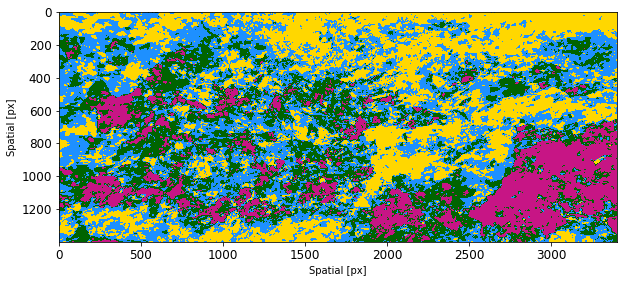

In [17]:
cluster_features = extract_clusters_features(input_image,
                         ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4'])